# Wildfires in Australia Analysis

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [5]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv')
df.head()

,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [7]:
df.columns, df.dtypes

(Index(['Region', 'Date', 'Estimated_fire_area',
        'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
        'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
        'Replaced'],
       dtype='object'),
 Region                                  object
 Date                                    object
 Estimated_fire_area                    float64
 Mean_estimated_fire_brightness         float64
 Mean_estimated_fire_radiative_power    float64
 Mean_confidence                        float64
 Std_confidence                         float64
 Var_confidence                         float64
 Count                                    int64
 Replaced                                object
 dtype: object)

In [14]:
df["Year"] = pd.to_datetime(df['Date']).dt.year
df["Month"] = pd.to_datetime(df['Date']).dt.month
df.columns, df.dtypes

(Index(['Region', 'Date', 'Estimated_fire_area',
        'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
        'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
        'Replaced', 'Year', 'Month'],
       dtype='object'),
 Region                                  object
 Date                                    object
 Estimated_fire_area                    float64
 Mean_estimated_fire_brightness         float64
 Mean_estimated_fire_radiative_power    float64
 Mean_confidence                        float64
 Std_confidence                         float64
 Var_confidence                         float64
 Count                                    int64
 Replaced                                object
 Year                                     int32
 Month                                    int32
 dtype: object)

## the change in average estimated fire area over time (use pandas to plot)

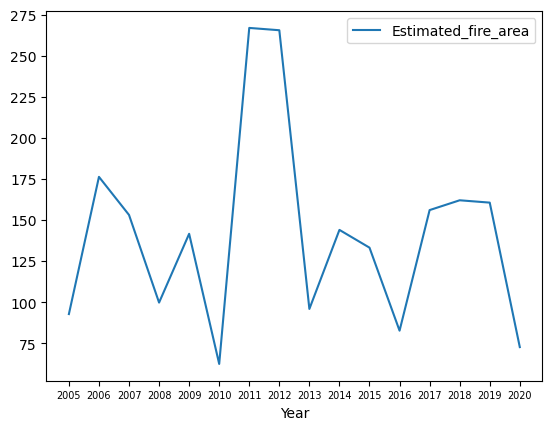

In [37]:
f1 = df.groupby('Year')['Estimated_fire_area'].mean().reset_index()
f1.plot(kind='line', x='Year', y='Estimated_fire_area')
plt.xticks(ticks=f1['Year'], fontsize=7)
plt.show()

## You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.

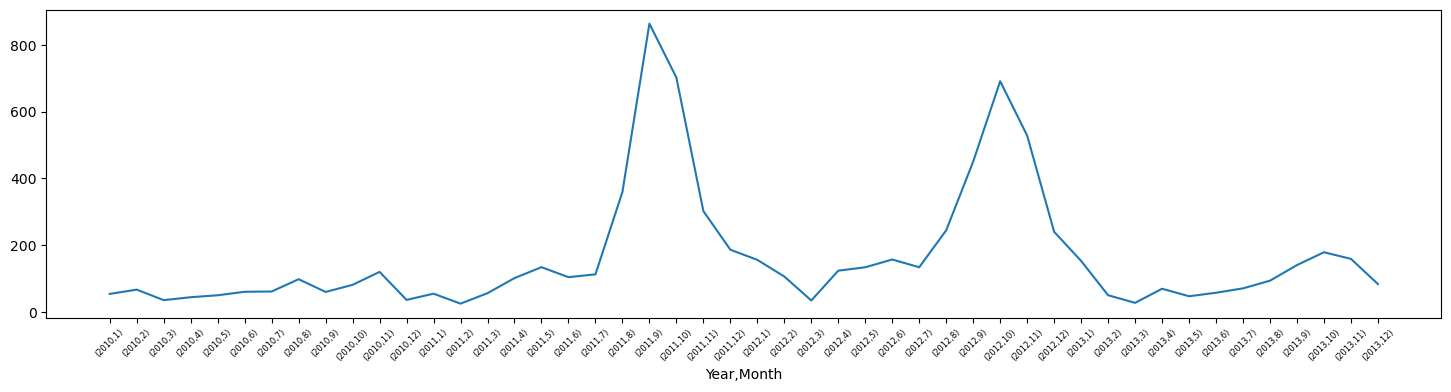

In [83]:
f2 = df[(df['Year']>=2010) & (df['Year']<=2013)].groupby(['Year','Month'])['Estimated_fire_area'].mean()
f2.plot(kind='line', x=f2.index, y='Estimated_fire_area', figsize=(18,4))

ticks = [(year, month) for year in range(2010, 2014) for month in range(1, 13)]
labels = [f"({year},{month})" for year, month in ticks]

plt.xticks(range(len(labels)), labels=labels, rotation=45, fontsize=6)
plt.show()

## Let's have an insight on the distribution of mean estimated fire brightness across the regions use the functionality of seaborn to develop a barplot

<Axes: xlabel='Region', ylabel='Mean_estimated_fire_brightness'>

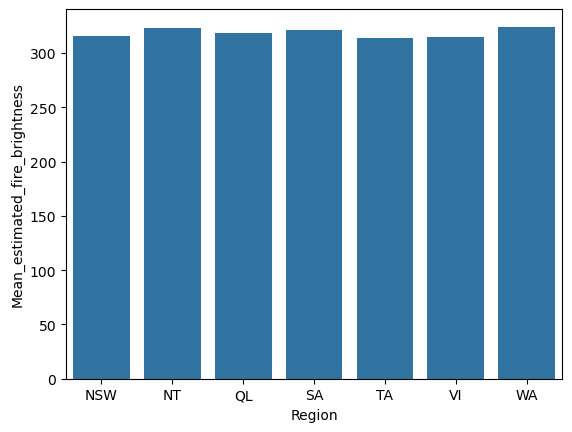

In [116]:
f3 = df.groupby('Region')["Mean_estimated_fire_brightness"].mean().reset_index()
sns.barplot(x="Region", y="Mean_estimated_fire_brightness", data=f3)

## Let's find the portion of count of pixels for presumed vegetation fires vary across regions we will develop a pie chart for this

NSW 6.17
NT 34.13
QL 22.12
SA 1.85
TA 0.6
VI 2.76
WA 32.37


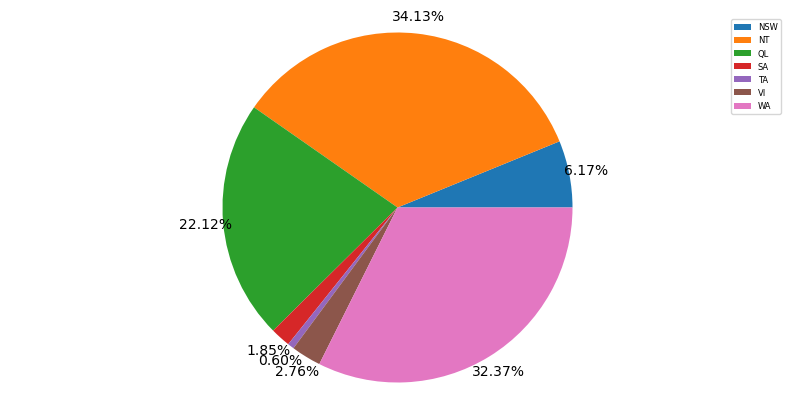

In [176]:
f4 = df.groupby('Region')["Count"].sum().reset_index()

plt.figure(figsize=(10,5))
plt.pie(x="Count",data=f4, autopct='%0.2f%%', pctdistance=1.1)

for i,k in zip(f4.Region, f4.Count):
     print(i,round(k/f4.Count.sum()*100,2))          

plt.axis('equal')
plt.legend(labels=f4['Region'], fontsize=6)
plt.show()

## Let's try to develop a histogram of the mean estimated fire brightness Using Matplotlib to create the histogram

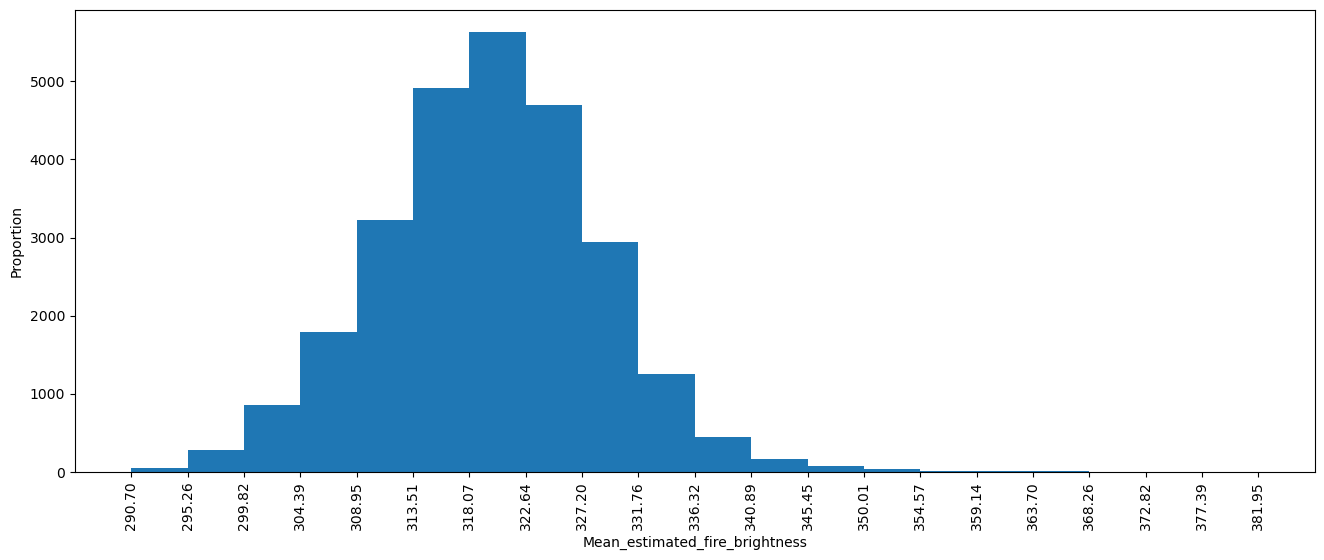

In [216]:
plt.figure(figsize=(16,6))
(n, bins, patches) =plt.hist(df["Mean_estimated_fire_brightness"], bins=20)

plt.xlabel("Mean_estimated_fire_brightness")
plt.ylabel("Proportion")
plt.xticks(bins, rotation=90)
plt.show()

## What if we need to understand the distribution of estimated fire brightness across regions? Let's use the functionality of seaborn and pass region as hue

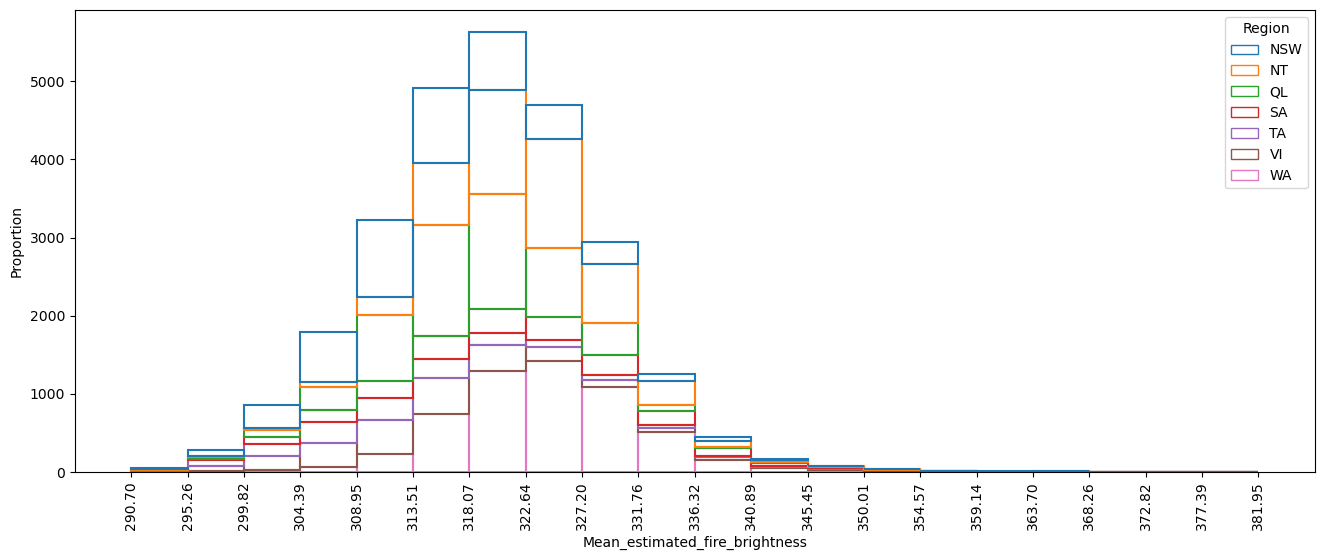

In [238]:
plt.figure(figsize=(16,6))
sns.histplot(x=df["Mean_estimated_fire_brightness"], bins=20, hue=df["Region"], fill=False, multiple='stack')

plt.xlabel("Mean_estimated_fire_brightness")
plt.ylabel("Proportion")
plt.xticks(bins, rotation=90)
plt.show()

## Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level?

<Axes: xlabel='Mean_confidence', ylabel='Mean_estimated_fire_radiative_power'>

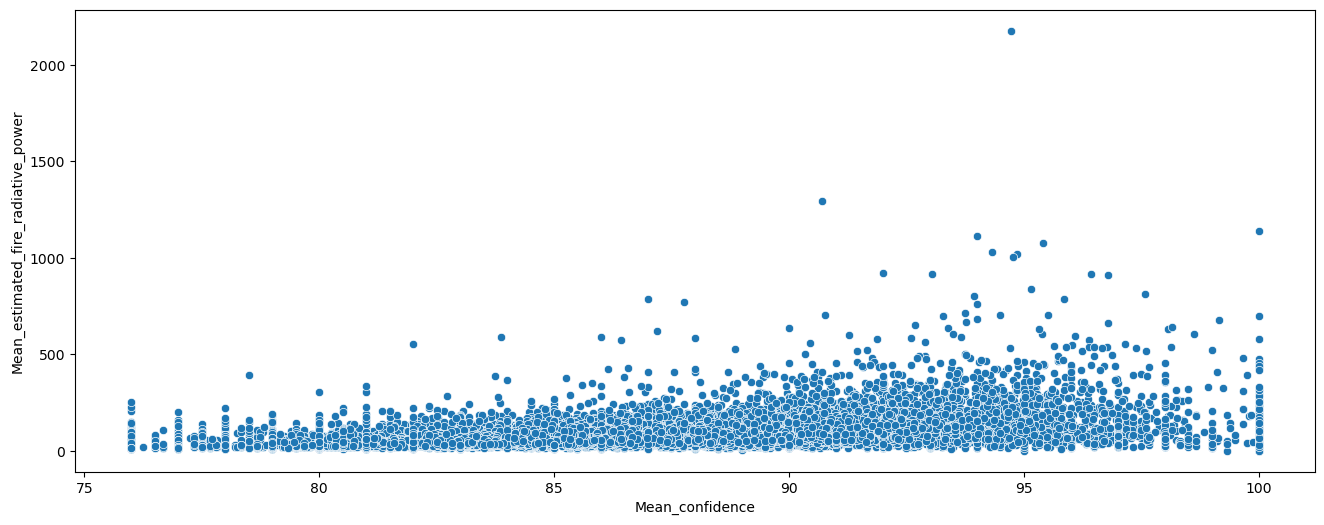

In [251]:
plt.figure(figsize=(16,6))
sns.scatterplot(y='Mean_estimated_fire_radiative_power', x='Mean_confidence', data=df)

In [254]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [266]:
aust_map = folium.Map(location=[-25.274398, 133.775136], zoom_start=5)

for lat, lng, label in zip(reg.Lat, reg.Lon, reg.region):
    folium.vector_layers.CircleMarker(
    [lat, lng], popup=label, radius=5, color='orange', fill_color='write', fill_opacity=0.6).add_to(aust_map)
   
aust_map